<a href="https://colab.research.google.com/github/data602sps/assignments/blob/master/05_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Assignment 8**

# **Weeks 10 & 11 - matplotlib & seaborn**
* In this homework assignment, you will explore and analyze a public dataset of your choosing. Since this assignment is “open-ended” in nature, you are free to expand upon the requirements below. However, you must meet the minimum requirments as indicated in each section. 


* The preferred method for this analysis is in a .ipynb file. Feel free to use whichever platform of your choosing.  


### **Some data examples:**
•	https://www.data.gov/

•	https://opendata.cityofnewyork.us/

•	https://datasetsearch.research.google.com/

•	https://archive.ics.uci.edu/ml/index.php

### **Resources:**

•	https://pandas.pydata.org/pandas-docs/stable/getting_started/10min.html 

•	https://www.oreilly.com/library/view/python-data-science/9781491912126/ch04.html

•	https://www.data-to-viz.com/



### **Headings or comments**
**You are required to make use of comments, or headings for each section.  You must explain what your code is doing, and the results of running your code.**  Act as if you were giving this assignment to your manager - you must include clear and descriptive information for each section.

### **You may work as a group or indivdually on this assignment.**


# Introduction

In this section, please describe the dataset you are using.  Include a link to the source of this data.  You should also provide some explanation on why you choose this dataset.

I am using diabtes dataset from below link
https://www.kaggle.com/datasets/akshaydattatraykhare/diabetes-dataset

I have also uploaded it on github at:
https://raw.githubusercontent.com/Naik-Khyati/diabetes/main/diabetes.csv

Diabetes Kaggle dataset is a commonly used dataset in the field of machine learning and data analysis. The diabetes dataset contains several features such as pregnancies, glucose levels, blood pressure, skin thickness, insulin levels, body mass index, diabetes pedigree function, age, and an outcome variable indicating whether a patient has diabetes or not. Therefore, it serves as a good example dataset for demonstrating data visualization techniques and data analysis in general.

______________
# Data Exploration
Import your dataset into your .ipynb, create dataframes, and explore your data.  

Include: 

* Summary statistics means, medians, quartiles, 
* Missing value information
* Any other relevant information about the dataset.  



In [15]:
#import libraries
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
url = 'https://raw.githubusercontent.com/Naik-Khyati/diabetes/main/diabetes.csv'
df= pd.read_csv(url)

# Summary statistics means, medians, quartiles
print(df.describe())

# Check missing values 
# There are no null values in the dataset
print(df.isnull().sum())

# Any other relevant information about the dataset.
print(df.shape)
print(df.dtypes)

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  

# Data Wrangling

Perform data wrangling.  You are free to use your best judgment here.  If you are stuck, look at previous assignment.

In [17]:
#checking for 0 values in 5 columns , Age & DiabetesPedigreeFunction do not have have minimum 0 value so no need to replace , also no. of pregnancies as 0 is possible as observed in df.describe
print(df[df['BloodPressure']==0].shape[0])
print(df[df['Glucose']==0].shape[0])
print(df[df['SkinThickness']==0].shape[0])
print(df[df['Insulin']==0].shape[0])
print(df[df['BMI']==0].shape[0])

35
5
227
374
11


In [18]:
#replacing 0 values with median of that column
'''
Some of the columns have a skewed distribution, so the mean is more affected by outliers than the median. Glucose 
and Blood Pressure have normal distributions hence we replace 0 values in those columns by mean value. S
kinThickness, Insulin,BMI have skewed distributions hence median is a better choice as it is less affected by outliers.
'''
df['Glucose']=df['Glucose'].replace(0,df['Glucose'].mean())#normal distribution
df['BloodPressure']=df['BloodPressure'].replace(0,df['BloodPressure'].mean())#normal distribution
df['SkinThickness']=df['SkinThickness'].replace(0,df['SkinThickness'].median())#skewed distribution
df['Insulin']=df['Insulin'].replace(0,df['Insulin'].median())#skewed distribution
df['BMI']=df['BMI'].replace(0,df['BMI'].median())#skewed distribution

In [19]:
#checking again if there are any 0 values in the dataset. we can see that all the 0 values are being replaced
print(df[df['BloodPressure']==0].shape[0])
print(df[df['Glucose']==0].shape[0])
print(df[df['SkinThickness']==0].shape[0])
print(df[df['Insulin']==0].shape[0])
print(df[df['BMI']==0].shape[0])

0
0
0
0
0


# Visualizations

The main purpose of this assignment is to practice creating various visualizations using the matplotlib and seaborn library.

### **Part 1:**
Using matplotlib, create ***two or more plots*** that incorporate at least **5** of the following properties:

Note: these properties vary based on your data.  The goal is to practice creating visualizations and modifying its properties. 

*   Use and change a legend position
*   Change a legend font size
*   Place a legend outside of the plot
*   Create a single legend for all subplots
*   Change the title and x/y labels
*   Change the marker, line colors, and line width
*   Add annotations
*   Modify Axis Text Ticks/Labels
*   Change size of axis Labels
*   Your own choice not included above 


Plots that you can create **include**:

*   Scatter Plot
*   Bar plot
*   Line Chart
*   Multi Plots (e.g. using .subplot()
*   Histogram

You can add another plot not listed here if it works better for your data.  This is not a complete list of plots to create.

### **Part 2:**

Recreate the visualizations above using the Seaborn library as best as possible.  


**You are required to explain what each of your plots is representing. Plots without comments will not be accepted.**  In addition, please explain the properties you are showcasing.


### **Part 3:**
In a comment or text box, explain the differences between creating a plot in matplotlib and seaborn, based on your above plots.



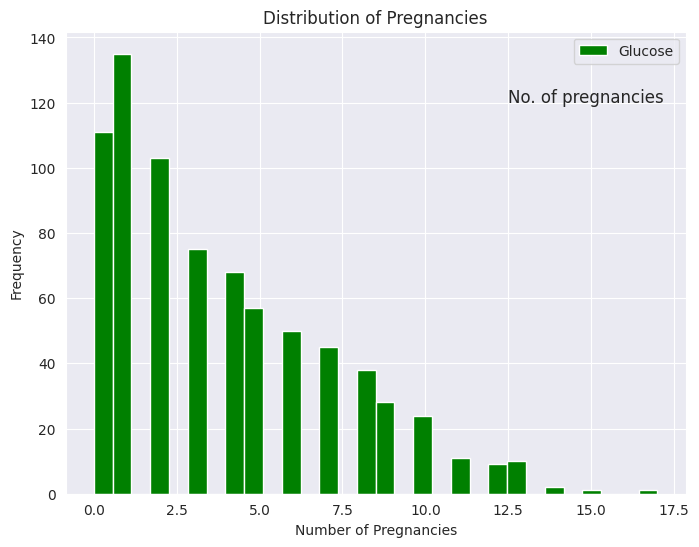

In [20]:
#Part 1  (plots using matplotlib)
# Chart 1.1
# Change the marker, line colors, and line width
# Modify Axis Text Ticks/Labels 
# Use and change a legend position

plt.figure(figsize=(8,6))
plt.hist(df['Pregnancies'], bins=30, color='green')

# Set the title and axis labels
plt.title('Distribution of Pregnancies')
plt.xlabel('Number of Pregnancies')
plt.ylabel('Frequency')

# adding annotation to the plot
plt.text(12.5, 120, 'No. of pregnancies', fontsize=12)

# changing the legend position and font size
plt.legend(['Glucose'], loc='upper right', fontsize=10)

# Show the plot
plt.show()

# Comments 
# The plot represents the distribution of the number of pregnancies in the diabetes dataset. 
# The histogram shows the frequency of the number of pregnancies for the individuals in the dataset.
# the chart is skewed to the left with most of the observations with less than 3 pregnancies.

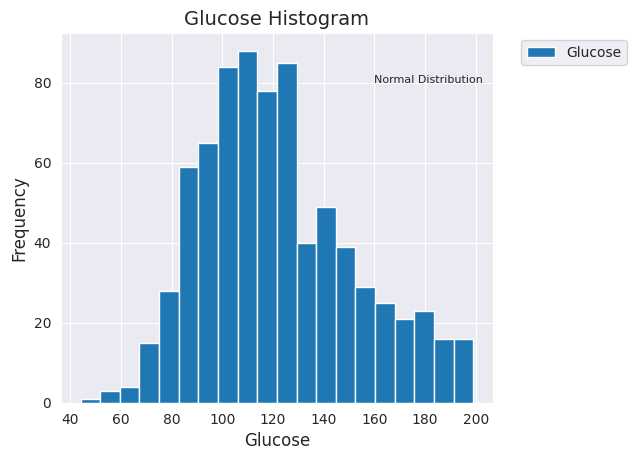

In [21]:
# Part 1 (plots using matplotlib)
# Chart 2.1
# (changes made) 
# we  added a legend outside of the plot
#  Change size of axis Labels

import matplotlib.pyplot as plt

# plotting a histogram for glucose, we can see there is a normal distribution of glucose variable in the dataset
plt.hist(df['Glucose'], bins=20) 

plt.xlabel('Glucose', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Glucose Histogram', fontsize=14)

# changing the legend position and font size
plt.legend(['Glucose'], loc='upper right', fontsize=10)

# placing the legend outside the plot
plt.subplots_adjust(right=0.8)
plt.legend(['Glucose'], bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)

# adding annotation to the plot
plt.text(160, 80, 'Normal Distribution', fontsize=8)

# modifying axis text ticks/labels and their size
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()

# Comments
# This plot shows the distribution of the 'Glucose' variable in the diabetes dataset using a histogram.
# Most of the observations are in the 90 to 130 glucose level and chart looks normally distributed.

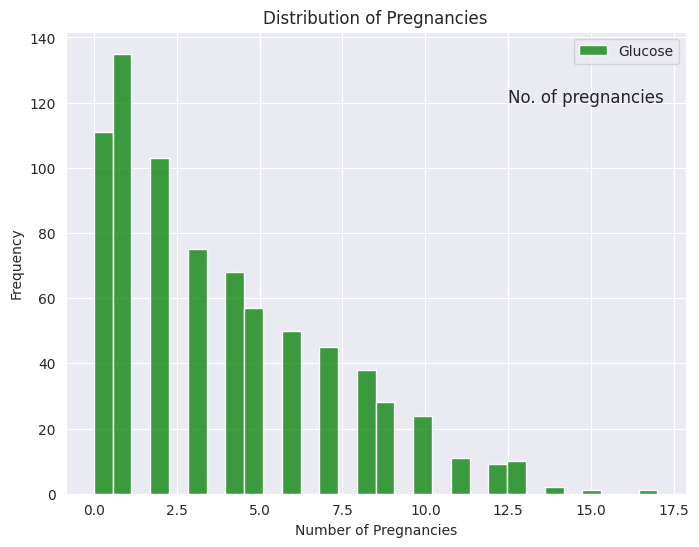

In [22]:
#part2 create above charts using seaborne 
# Chart 1.2
# In this graph we can see the data is skewed a little towards the right side

import seaborn as sns

plt.figure(figsize=(8,6))
sns.histplot(data=df, x='Pregnancies', bins=30, color='green')

# Set the title and axis labels
plt.title('Distribution of Pregnancies')
plt.xlabel('Number of Pregnancies')
plt.ylabel('Frequency')

# adding annotation to the plot
plt.text(12.5, 120, 'No. of pregnancies', fontsize=12)

# changing the legend position and font size
plt.legend(['Glucose'], loc='upper right', fontsize=10)

# Show the plot
plt.show()

# Comments
# The plot represents the distribution of the number of pregnancies in the diabetes dataset. 
# The histogram shows the frequency of the number of pregnancies for the individuals in the dataset.
# the chart is skewed to the left with most of the observations with less than 3 pregnancies.

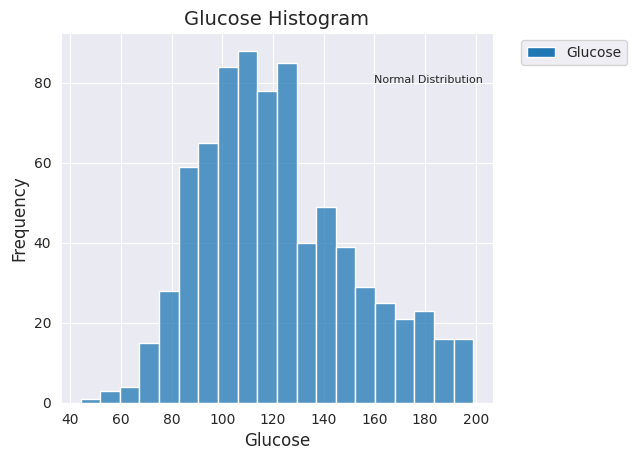

In [23]:
#part2 create above charts using seaborne 
# Chart 2.2
# In this graph we can see the data is skewed a little towards the right side

sns.set_style('darkgrid')
sns.histplot(data=df, x='Glucose', bins=20)

plt.xlabel('Glucose', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Glucose Histogram', fontsize=14)

# changing the legend position and font size
plt.legend(['Glucose'], loc='upper right', fontsize=10)

# placing the legend outside the plot
plt.subplots_adjust(right=0.8)
plt.legend(['Glucose'], bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)

# adding annotation to the plot
plt.text(160, 80, 'Normal Distribution', fontsize=8)

# modifying axis text ticks/labels and their size
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)


plt.show()

# Comments
# This plot shows the distribution of the 'Glucose' variable in the diabetes dataset using a histogram.
# Most of the observations are in the 90 to 130 glucose level and chart looks normally distributed.

**explain the differences between creating a plot in matplotlib and seaborn, based on your above plots.**

Both Matplotlib and Seaborn are powerful visualization libraries in Python, but they have some differences in their syntax and capabilities.

Matplotlib is a base plotting library that allows for a lot of customization and control over plots. It provides a lot of options for customization of plots such as line styles, colors, markers, and sizes. However, it requires more code to produce a plot and its syntax can be a bit verbose. It is suitable for creating basic to complex plots with a high degree of customization.

On the other hand, Seaborn is a higher-level library built on top of Matplotlib, which provides a higher level of abstraction and simplification. It is designed to make visualization easy by providing a range of pre-built functions to create different types of statistical plots. It is particularly good at visualizing statistical relationships, such as scatter plots, regression plots, and distribution plots. The syntax is more concise and produces aesthetically pleasing plots with fewer lines of code.

In the above plots, we can see that the Seaborn plot uses less code and produces a similar-looking histogram to the Matplotlib histogram. Seaborn's syntax allows for the easy customization of plots by using various built-in functions. Overall, the choice between Matplotlib and Seaborn depends on the nature of the data and the type of visualization needed.

# Conclusions  


Based on the plots created using the diabetes dataset, we can see that there is a normal distribution of glucose in the dataset.Also, number of pregnancies chart is left skewed with most observations have less than 3 pregnancies.

Both matplotlib and seaborn can be used to create similar plots, however seaborn provides a more concise syntax and offers several advanced visualization options such as heatmaps, pair plots, and violin plots. 

Overall, the choice between using matplotlib or seaborn depends on personal preference and the type of visualization needed